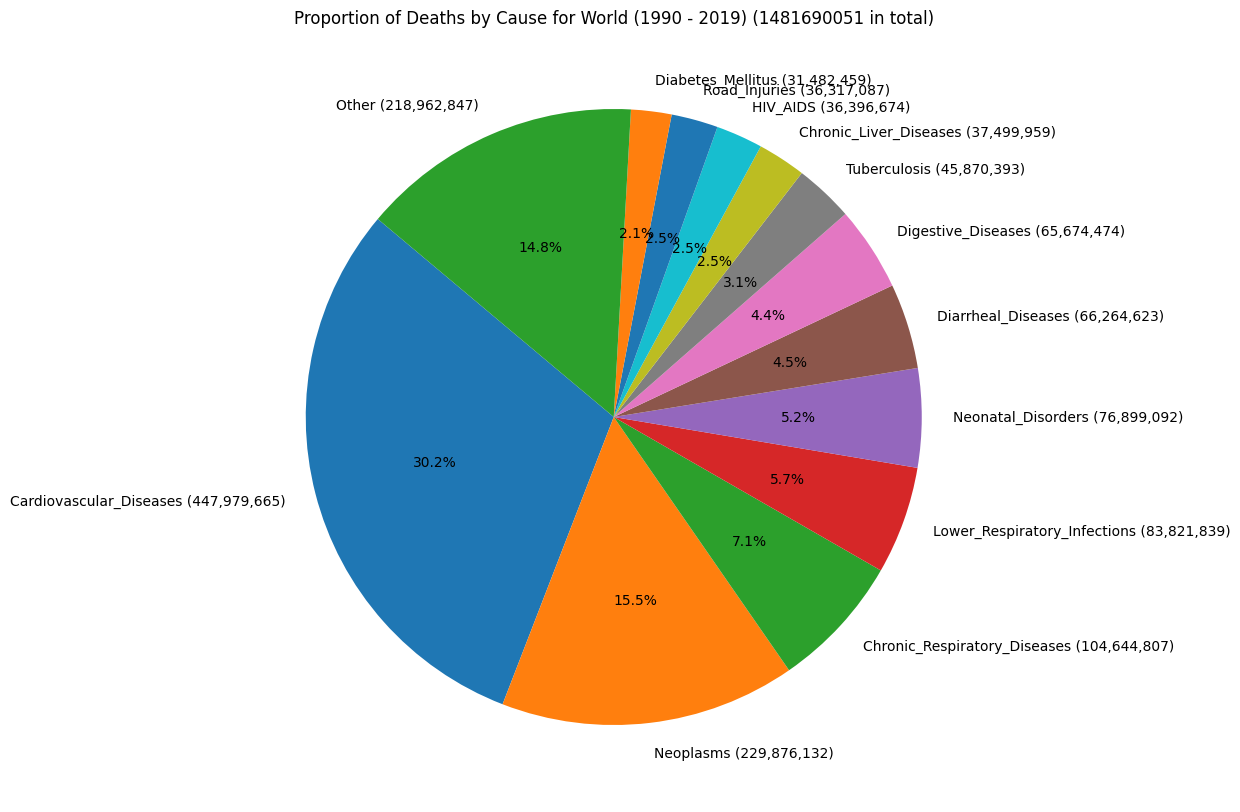

In [1]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect('deathdata.db')

# Query to get the total deaths for each cause for 'World'
world_causes_query = """
SELECT 
    "Deaths - Meningitis - Sex: Both - Age: All Ages (Number)" AS Meningitis,
    "Deaths - Alzheimer's disease and other dementias - Sex: Both - Age: All Ages (Number)" AS Alzheimers,
    "Deaths - Parkinson's disease - Sex: Both - Age: All Ages (Number)" AS Parkinsons,
    "Deaths - Nutritional deficiencies - Sex: Both - Age: All Ages (Number)" AS Nutritional_Deficiencies,
    "Deaths - Malaria - Sex: Both - Age: All Ages (Number)" AS Malaria,
    "Deaths - Drowning - Sex: Both - Age: All Ages (Number)" AS Drowning,
    "Deaths - Interpersonal violence - Sex: Both - Age: All Ages (Number)" AS Interpersonal_Violence,
    "Deaths - Maternal disorders - Sex: Both - Age: All Ages (Number)" AS Maternal_Disorders,
    "Deaths - HIV/AIDS - Sex: Both - Age: All Ages (Number)" AS HIV_AIDS,
    "Deaths - Drug use disorders - Sex: Both - Age: All Ages (Number)" AS Drug_Use_Disorders,
    "Deaths - Tuberculosis - Sex: Both - Age: All Ages (Number)" AS Tuberculosis,
    "Deaths - Cardiovascular diseases - Sex: Both - Age: All Ages (Number)" AS Cardiovascular_Diseases,
    "Deaths - Lower respiratory infections - Sex: Both - Age: All Ages (Number)" AS Lower_Respiratory_Infections,
    "Deaths - Neonatal disorders - Sex: Both - Age: All Ages (Number)" AS Neonatal_Disorders,
    "Deaths - Alcohol use disorders - Sex: Both - Age: All Ages (Number)" AS Alcohol_Use_Disorders,
    "Deaths - Self-harm - Sex: Both - Age: All Ages (Number)" AS Self_Harm,
    "Deaths - Exposure to forces of nature - Sex: Both - Age: All Ages (Number)" AS Forces_of_Nature,
    "Deaths - Diarrheal diseases - Sex: Both - Age: All Ages (Number)" AS Diarrheal_Diseases,
    "Deaths - Environmental heat and cold exposure - Sex: Both - Age: All Ages (Number)" AS Heat_and_Cold_Exposure,
    "Deaths - Neoplasms - Sex: Both - Age: All Ages (Number)" AS Neoplasms,
    "Deaths - Conflict and terrorism - Sex: Both - Age: All Ages (Number)" AS Conflict_and_Terrorism,
    "Deaths - Diabetes mellitus - Sex: Both - Age: All Ages (Number)" AS Diabetes_Mellitus,
    "Deaths - Chronic kidney disease - Sex: Both - Age: All Ages (Number)" AS Chronic_Kidney_Disease,
    "Deaths - Poisonings - Sex: Both - Age: All Ages (Number)" AS Poisonings,
    "Deaths - Protein-energy malnutrition - Sex: Both - Age: All Ages (Number)" AS Protein_Energy_Malnutrition,
    "Deaths - Road injuries - Sex: Both - Age: All Ages (Number)" AS Road_Injuries,
    "Deaths - Chronic respiratory diseases - Sex: Both - Age: All Ages (Number)" AS Chronic_Respiratory_Diseases,
    "Deaths - Cirrhosis and other chronic liver diseases - Sex: Both - Age: All Ages (Number)" AS Chronic_Liver_Diseases,
    "Deaths - Digestive diseases - Sex: Both - Age: All Ages (Number)" AS Digestive_Diseases,
    "Deaths - Fire, heat, and hot substances - Sex: Both - Age: All Ages (Number)" AS Fire_Heat_Substances,
    "Deaths - Acute hepatitis - Sex: Both - Age: All Ages (Number)" AS Acute_Hepatitis,
    "Deaths - Measles - Sex: Both - Age: All Ages (Number)" AS Measles
FROM death_causes
WHERE Entity = 'World'
"""

world_causes_result = pd.read_sql(world_causes_query, conn)

# Close the database connection
conn.close()

# Ensure there is at least one row and it's not NaN
if not world_causes_result.empty and not world_causes_result.isna().all().all():
    # Summing up all columns in case there are multiple entries for 'World' for some reason
    causes_totals = world_causes_result.sum().sort_values(ascending=False)

    # Calculate the total deaths for all causes
    total_world_deaths = causes_totals.sum()

        # Set a threshold for minimum deaths to be considered separately
    threshold = 30000000  # Example threshold, adjust as needed

    # Filter causes below the threshold into an 'Other' category
    other_sum = causes_totals[causes_totals < threshold].sum()
    causes_totals = causes_totals[causes_totals >= threshold]
    causes_totals['Other'] = other_sum

    # Create labels that include the death toll for each cause
    labels = [f'{index} ({value:,})' for index, value in causes_totals.items()]

    # Plotting the pie chart
    plt.figure(figsize=(12, 10))
    plt.pie(causes_totals, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title(f'Proportion of Deaths by Cause for World (1990 - 2019) ({total_world_deaths} in total)')
    plt.show()
else:
    print("No data available for 'World' or data is incomplete.")
